
# Setup

## Load packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import binom
import itertools
import helpers as hp
import simulations as sims
import importlib
importlib.reload(sims)

plt.style.use('ggplot')

FIG_PATH = "./../../figures/"

In [51]:
# copied and pasted from mathematica
def M(t,p,q):
    return -((2**t*(1 - p)**t*(-1 + 2*p - q))/(1 - 2*p + q))
def B(t,p,q):
    return (2*p*(1 - q)**t)/(-1 + 2*p - q) + (2**(1 + t)*(1 - p)**t*p)/(1 - 2*p + q)
def G(t,p,q):
    return (2**t*q)/(1 + q) - (2*p*(1 - q)**t*q)/((-1 + 2*p - q)*(1 + q)) - (2**t*(1 - p)**t*q)/(1 - 2*p + q)
def Sigma(t,p,q):
    return np.array([[2*p*(1-p)*M(t-1,p,q),2*p*(1-p)*M(t-1,p,q),0],\
                     [2*p*(1-p)*M(t-1,p,q),q*(1-q)*B(t-1,p,q)+2*p*(1-p)*M(t-1,p,q),q*(1-q)*B(t-1,p,q)],\
                    [0,q*(1-q)*B(t-1,p,q),q*(1-q)*B(t-1,p,q)]])
def d(p,q):
    return np.array([[2*(1-p),0,0],[2*p,1-q,0],[0,q,2]])
def L(p,q):
    return np.array([[1,1,1],[0,0,1]])

def Omega(t,p,q):
    Om = Sigma(t,p,q)
    for j in range(1,t-1):
        dp = np.linalg.matrix_power(d(p,q),t-j)
        Om = Om + dp @ Sigma(j,p,q) @ np.transpose(dp)
    return Om

def Omega_bar(t,p,q):
    return L(p,q) @ Omega(t,p,q) @ np.transpose(L(p,q))

def varGN_theory(t,p,q):
    M = Omega_bar(t,p,q)
    return M[1,1]-M[0,1]**2/M[0,0]

In [46]:
Omega_bar(10,0.2,0.8)

array([[156313.90878385, 126968.04053044],
       [126968.04053044, 104221.63290982]])

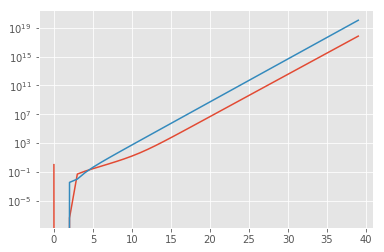

In [93]:
plt.semilogy([varGN_theory(t,0.02,0.999999) for t in range(40)])
plt.plot([varGN_theory(t,0.02,0.10) for t in range(40)])